# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
cities[0]

'busselton'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        

In [5]:
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b3ff37a40edf22f7c0171626f6994478


In [6]:

#create lists for storing api data
cityName = []
lat = []
lng = []
maxTemp = []
humidity = []
clouds = []
windSpeed = []
country = []
dates = []

# set initial count quantities for organization
countRecord = 1
countSet = 1

print(f"Beginning Data Retrieval")
print(f"------------------------------------------")

# loops for creating dataframe columns
for city in cities:
    
    
    try:
       
        response = requests.get(f"{url}&q={city}").json()
        cityName.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        windSpeed.append(response['wind']['speed'])               
        country.append(response['sys']['country'])
        dates.append(response['dt'])
        
        
        print(f"Processing Record {countRecord} of set {countSet} | {city}")  
                
        countRecord += 1
        #time.sleep(1)
         
        if countRecord == 51:
            countSet += 1
            countRecord = 1
   
    except KeyError:
        print("City not found. Skipping...")
        #print((f"{url}&q={city}"))
    #break
    continue
    
  

print(f"------------------------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------------------------")

Beginning Data Retrieval
------------------------------------------
Processing Record 1 of set 1 | busselton
City not found. Skipping...
Processing Record 2 of set 1 | ushuaia
Processing Record 3 of set 1 | kapaa
Processing Record 4 of set 1 | prince albert
Processing Record 5 of set 1 | manitouwadge
Processing Record 6 of set 1 | bluff
Processing Record 7 of set 1 | manaia
Processing Record 8 of set 1 | hualmay
City not found. Skipping...
Processing Record 9 of set 1 | iqaluit
Processing Record 10 of set 1 | barrow
Processing Record 11 of set 1 | saskylakh
Processing Record 12 of set 1 | arraial do cabo
City not found. Skipping...
Processing Record 13 of set 1 | katsuura
Processing Record 14 of set 1 | qaanaaq
Processing Record 15 of set 1 | butaritari
Processing Record 16 of set 1 | barcelos
Processing Record 17 of set 1 | el alto
Processing Record 18 of set 1 | hithadhoo
Processing Record 19 of set 1 | rikitea
Processing Record 20 of set 1 | riverton
City not found. Skipping...
Proc

Processing Record 36 of set 4 | ewo
Processing Record 37 of set 4 | nang rong
Processing Record 38 of set 4 | margate
Processing Record 39 of set 4 | carnarvon
Processing Record 40 of set 4 | vao
Processing Record 41 of set 4 | vila franca do campo
Processing Record 42 of set 4 | magadan
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of set 4 | chico
Processing Record 44 of set 4 | rosetta
Processing Record 45 of set 4 | saint-louis
Processing Record 46 of set 4 | kushiro
Processing Record 47 of set 4 | altamira
Processing Record 48 of set 4 | cherskiy
Processing Record 49 of set 4 | bahraich
Processing Record 50 of set 4 | bambous virieux
Processing Record 1 of set 5 | kavieng
Processing Record 2 of set 5 | lompoc
Processing Record 3 of set 5 | longyearbyen
Processing Record 4 of set 5 | dwarka
Processing Record 5 of set 5 | winnemucca
Processing Record 6 of set 5 | olafsvik
Processing Record 7 of set 5 | provideniya
Processing Record 8 of set 5 | mastung

Processing Record 27 of set 8 | bystryy istok
Processing Record 28 of set 8 | payo
Processing Record 29 of set 8 | aykhal
Processing Record 30 of set 8 | afrikanda
Processing Record 31 of set 8 | bukachacha
Processing Record 32 of set 8 | silver city
Processing Record 33 of set 8 | hobyo
Processing Record 34 of set 8 | sao francisco do sul
City not found. Skipping...
Processing Record 35 of set 8 | meulaboh
Processing Record 36 of set 8 | talnakh
City not found. Skipping...
Processing Record 37 of set 8 | tarko-sale
Processing Record 38 of set 8 | te anau
Processing Record 39 of set 8 | lagoa
Processing Record 40 of set 8 | nelson bay
Processing Record 41 of set 8 | ramanuj ganj
Processing Record 42 of set 8 | andenes
Processing Record 43 of set 8 | esna
Processing Record 44 of set 8 | surt
Processing Record 45 of set 8 | krabi
Processing Record 46 of set 8 | nioki
Processing Record 47 of set 8 | danville
Processing Record 48 of set 8 | nemuro
Processing Record 49 of set 8 | lamar
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictionary from the lists
cityDict = {
    "City": cityName,
    "Lat":lat, 
    "Lng":lng,
    "Max Temp": maxTemp,
    "Humidity": humidity,
    "Cloudiness":clouds, 
    "Wind Speed":windSpeed,
    "Country":country,
    "Date":dates      
    }

# Create a dataframe
city_data_df = pd.DataFrame(cityDict)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,89,96,21.36,AU,1588746684
1,Ushuaia,-54.80,-68.30,35.60,69,40,6.93,AR,1588746541
2,Kapaa,22.08,-159.32,75.20,78,75,12.75,US,1588746685
3,Prince Albert,53.20,-105.77,42.80,81,20,9.17,CA,1588746451
4,Manitouwadge,49.12,-85.84,33.39,94,100,10.65,CA,1588746685


In [8]:
#city_data_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,89,96,21.36,AU,1588746684
1,Ushuaia,-54.80,-68.30,35.60,69,40,6.93,AR,1588746541
2,Kapaa,22.08,-159.32,75.20,78,75,12.75,US,1588746685
3,Prince Albert,53.20,-105.77,42.80,81,20,9.17,CA,1588746451
4,Manitouwadge,49.12,-85.84,33.39,94,100,10.65,CA,1588746685
...,...,...,...,...,...,...,...,...,...
549,Sibu,2.30,111.82,91.40,63,75,3.36,MY,1588746821
550,Plouzané,48.38,-4.62,53.60,93,90,3.36,FR,1588746606
551,Paso de Carrasco,-34.86,-56.05,55.40,62,75,16.11,UY,1588746822
552,Batagay,67.63,134.63,35.80,80,97,3.36,RU,1588746822


In [10]:
#  Get the indices of cities that have humidity over 100%.
idx100 = city_data_df[city_data_df['Humidity'] > 100].index

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data_df = city_data_df.drop(idx100, inplace=False)

cleaned_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,55.99,89,96,21.36,AU,1588746684
1,Ushuaia,-54.80,-68.30,35.60,69,40,6.93,AR,1588746541
2,Kapaa,22.08,-159.32,75.20,78,75,12.75,US,1588746685
3,Prince Albert,53.20,-105.77,42.80,81,20,9.17,CA,1588746451
4,Manitouwadge,49.12,-85.84,33.39,94,100,10.65,CA,1588746685


In [27]:
# Extract relevant fields from the data frame
relevant_df = cleaned_city_data_df.filter(['City','Country', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date'], axis=1)
relevant_df.head() 
# Export the City_Data into a csv
relevant_df.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

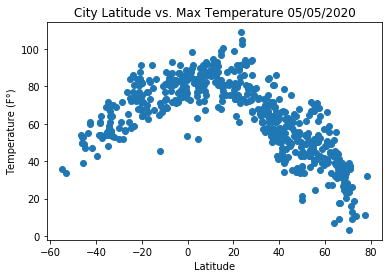

It tends to be hotter at the equator, this was observed by latitude 0.


In [13]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Max Temp"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F°)")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("output_data/City Latitude vs. Max Temperature.png")
plt.show()

print("It tends to be hotter at the equator, this was observed by latitude 0.")

## Latitude vs. Humidity Plot

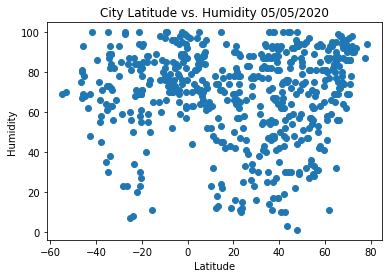

The to be hotter at the equator, this was observed by latitude 0.


In [14]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Humidity"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("output_data/City Latitude vs. Humidity.png")
plt.show()

print("The to be hotter at the equator, this was observed by latitude 0.")

## Latitude vs. Cloudiness Plot

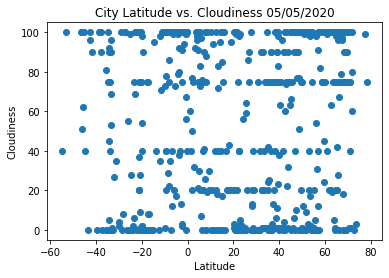

In [15]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Cloudiness"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")


# Save the chart
plt.savefig("output_data/City Latitude vs. Cloudinessy.png")
plt.show()

## Latitude vs. Wind Speed Plot

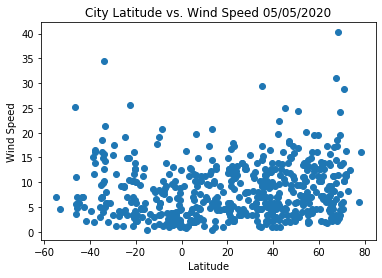

In [16]:
# Create a Scatter Plot of Latitude vs Max Temp
plt.scatter(relevant_df["Lat"], relevant_df["Wind Speed"], marker="o")

# Label the chart
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the chart
plt.savefig("output_data/City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

def regressionPlot(x_axis, y_axis, x_title, y_title, x_cord, y_cord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_axis, y_axis)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq,(x_cord,y_cord), fontsize=18, color="red")
    plt.xlabel(x_title, fontsize=16)
    plt.ylabel(y_title, fontsize=16)
    plt.title(f'{x_title} vs. {y_title} {time.strftime("%m/%d/%Y")}', fontsize=16)
    print(f"The R-Squared is: {rvalue}")
    return

#regressionPlot(relevant_df['Lat'],relevant_df['Max Temp'],'Latitude','Temperature')

In [18]:
# Create Northern and Southern Hemisphere DataFrames

# Northern Hemisphere
northHemi_df = relevant_df[relevant_df['Lat'] >= 0]

# Southern Hemisphere
southHemi_df = relevant_df[relevant_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared is: -0.8505808795881563


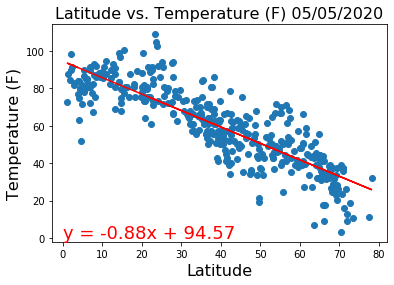

In [19]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Max Temp'],'Latitude','Temperature (F)', 0, 0)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Squared is: 0.748932301147377


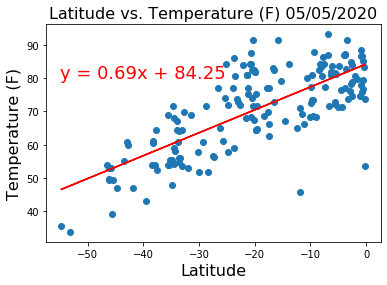

In [20]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Max Temp'],'Latitude','Temperature (F)',-55, 80)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared is: 0.15623296890319566


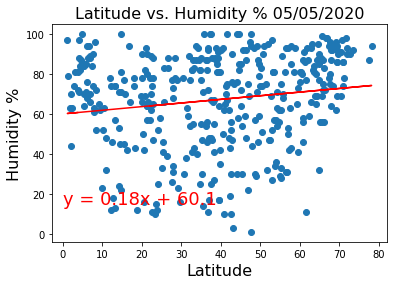

In [21]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Humidity'],'Latitude','Humidity %', 0, 15)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-Squared is: 0.21709389383870065


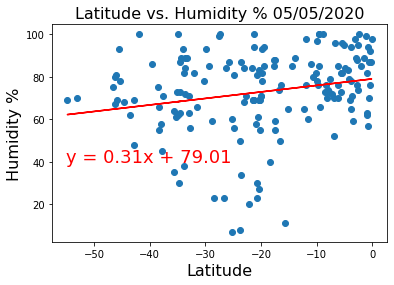

In [22]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Humidity'],'Latitude','Humidity %',-55, 40)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared is: 0.15013704327451927


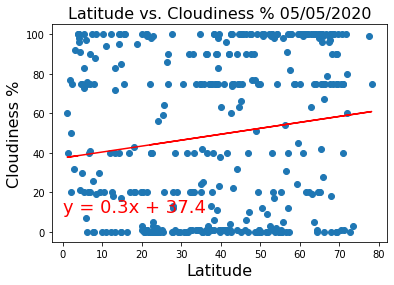

In [23]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Cloudiness'],'Latitude','Cloudiness %', 0, 10)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Squared is: 0.09947688224524655


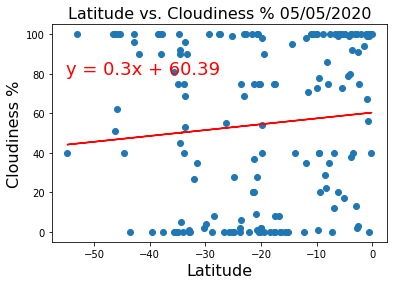

In [24]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Cloudiness'],'Latitude','Cloudiness %',-55, 80)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared is: 0.19329704320983834


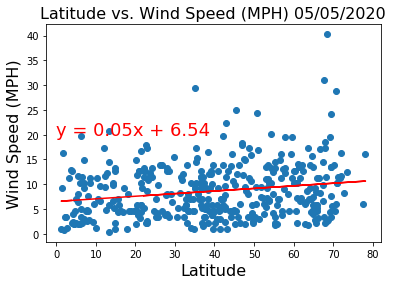

In [25]:
regressionPlot(northHemi_df['Lat'],northHemi_df['Wind Speed'],'Latitude','Wind Speed (MPH)', 0, 20)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Squared is: -0.26328552382876236


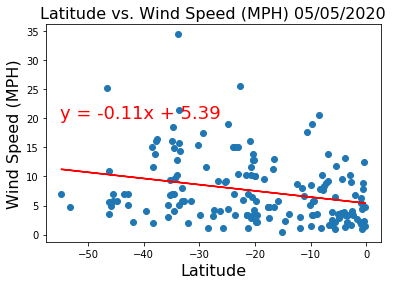

In [26]:
regressionPlot(southHemi_df['Lat'],southHemi_df['Wind Speed'],'Latitude','Wind Speed (MPH)',-55, 20)